<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsBasicKG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Overview

The provided code, intended to be run in Google Colab, implements a pipeline for extracting, processing, and visualizing knowledge from a webpage. The process is broken down into several key steps:

1. **Installing Necessary Packages**: The code starts by installing required Python packages: `requests`, `bs4` (Beautiful Soup), `spacy`, `networkx`, and `matplotlib`. This ensures that all the necessary libraries for web scraping, natural language processing, and graph visualization are available in the Colab environment.

2. **Importing Libraries**: It imports the necessary Python libraries that were installed in the first step.

3. **Fetching Webpage Content**:
    - A function `fetch_webpage_content` is defined to retrieve the HTML content of a given URL using the `requests` library.
    - This function is then used to fetch the content from "https://civichonors.com/".

4. **Extracting Relevant Text**:
    - The function `extract_text_from_html` uses Beautiful Soup to parse the HTML content and extract clean text, removing any scripts or style elements.

5. **Knowledge Mapping**:
    - The text is processed using the `spacy` NLP library in the `map_knowledge` function.
    - This function identifies and maps key entities (like names, places, etc.) in the text.

6. **Knowledge Reduction**:
    - The `reduce_knowledge` function takes the mapped knowledge (entities and their types) and organizes it into a knowledge graph format, essentially creating a simple form of a graph database.

7. **Saving the Knowledge Graph**:
    - The knowledge graph is saved to a JSON file using the `save_knowledge_graph` function. This allows for persistent storage and later retrieval of the structured knowledge.

8. **Visualizing the Knowledge Graph**:
    - Finally, the `visualize_knowledge_graph` function uses `networkx` and `matplotlib` to create and display a visual representation of the knowledge graph.
    - This visualization creates a graph where nodes represent entities or labels, and edges represent their associations.

By running these steps sequentially in a Google Colab notebook, one can extract meaningful information from a webpage and visualize it as a knowledge graph, providing a clear and interactive way to understand the relationships and key concepts present in the text.

# Step 1: Install Necessary Package

In [1]:
!pip install requests bs4 spacy networkx matplotlib
!python -m spacy download en_core_web_sm

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=c1a59ccb5317d7d00e1fcbf79a2c91708773524f8f0da74e9d0a7b6ebc30beb1
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
2023-12-15 20:53:21.937313: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 20:53:21.937380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 20:53:21.938804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 20:53:21.947323: I tensorflow/core/platf

# Step 2: Import Libraries and Define Functions

Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import defaultdict
import json
import networkx as nx
import matplotlib.pyplot as plt

Fetch Webpage Content

In [3]:
def fetch_webpage_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

webpage_content = fetch_webpage_content('https://civichonors.com/')

Extract Relevant Content

In [4]:
def extract_text_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    for script_or_style in soup(['script', 'style']):
        script_or_style.extract()
    text = soup.get_text()
    return text

extracted_text = extract_text_from_html(webpage_content)

Knowledge Mapping

In [5]:
nlp = spacy.load("en_core_web_sm")

def map_knowledge(text):
    doc = nlp(text)
    knowledge_map = []
    for entity in doc.ents:
        knowledge_map.append((entity.text, entity.label_))
    return knowledge_map

knowledge_map = map_knowledge(extracted_text)

Knowledge Reduction

In [6]:
def reduce_knowledge(knowledge_map):
    knowledge_graph = defaultdict(list)
    for entity, label in knowledge_map:
        knowledge_graph[label].append(entity)
    return knowledge_graph

knowledge_graph = reduce_knowledge(knowledge_map)

Save the Knowledge Graph

In [7]:
def save_knowledge_graph(knowledge_graph, filename='knowledge_graph.json'):
    with open(filename, 'w') as file:
        json.dump(knowledge_graph, file)

save_knowledge_graph(knowledge_graph)

Visualize Knowledge Graph

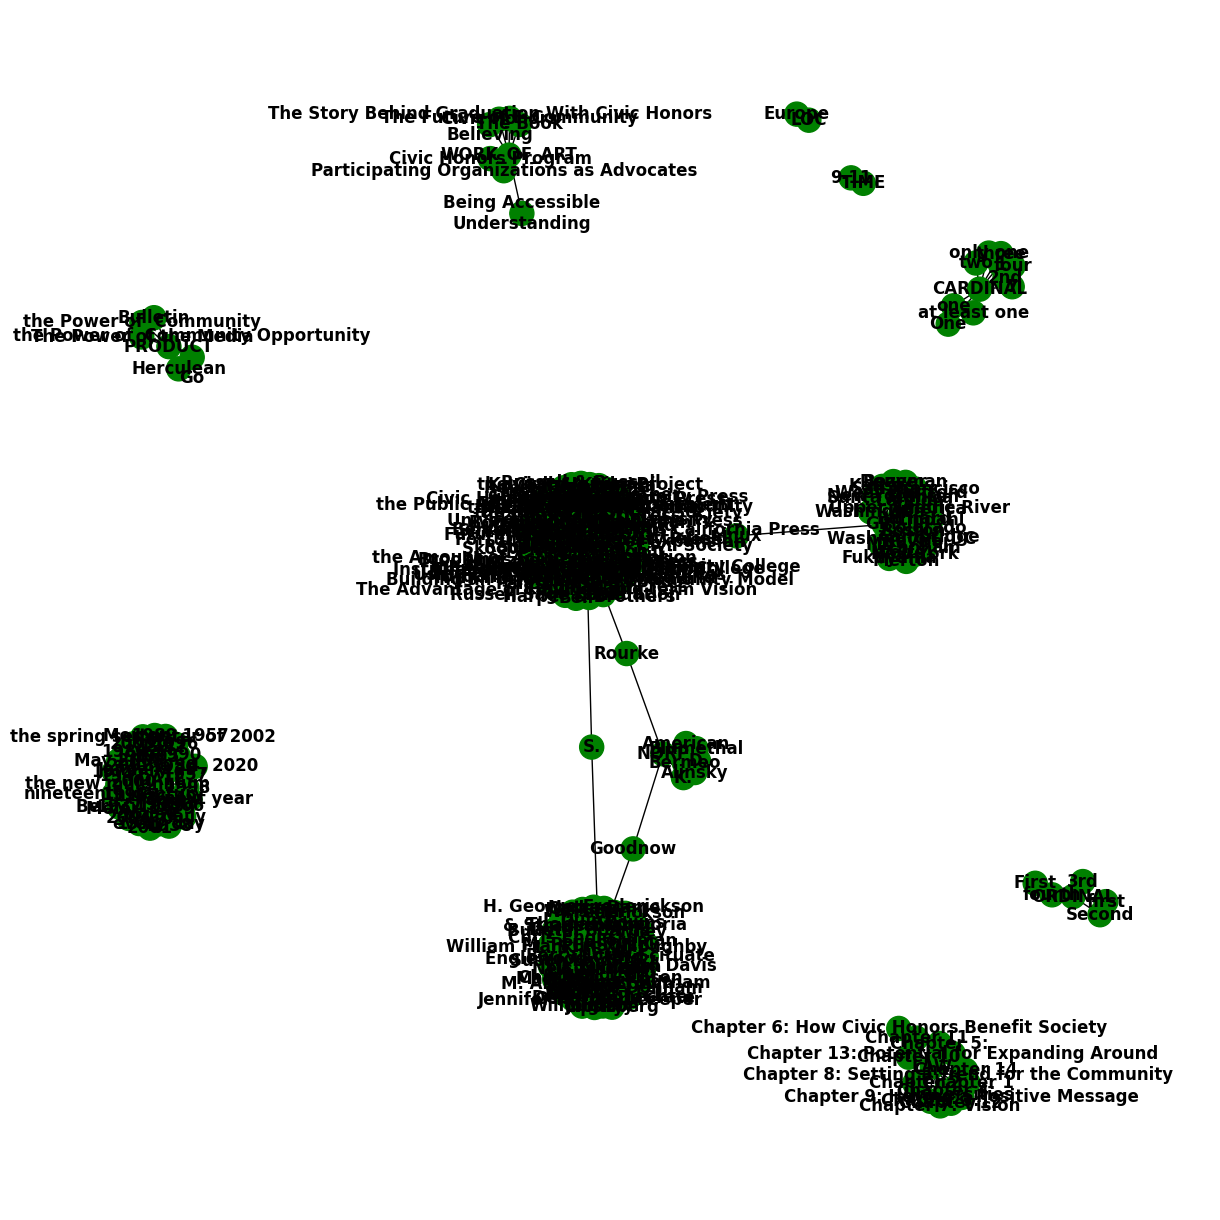

In [8]:
def visualize_knowledge_graph(knowledge_graph):
    G = nx.Graph()

    # Add nodes and edges to the graph
    for label, entities in knowledge_graph.items():
        for entity in entities:
            G.add_node(entity, label=label)
            G.add_edge(label, entity)

    # Define node colors based on the label
    color_map = []
    for node in G:
        if G.nodes[node].get('label') == node:  # label nodes
            color_map.append('lightblue')
        else:
            color_map.append('green')

    plt.figure(figsize=(12, 12))
    nx.draw(G, with_labels=True, node_color=color_map, font_weight='bold')
    plt.show()

visualize_knowledge_graph(knowledge_graph)